#Image-based Prediction using `hugging face models`

In [1]:
!pip -q install unsloth

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1 requires torch==2.2.1, but you have torch 2.7.1 which is incompatible.


In [2]:
# !apt install poppler-utils
!pip -q install pdf2image
# !sudo apt install tesseract-ocr


In [3]:
import os
from unsloth import FastVisionModel
import torch
from datasets import load_dataset
from transformers import TextStreamer
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/home/Ubuntu/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!


In [13]:
import concurrent.futures
import time

# Simulated task (e.g., file processing, API call)
def process_task(task_id):
    print(f"🔧 Starting task {task_id}")
    time.sleep(2)  # Simulate work
    print(f"✅ Finished task {task_id}")
    return f"Result of {task_id}"

def main():
    tasks = range(10)  # 10 tasks to run

    # Thread-based parallelism (good for I/O-bound)
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        results = list(executor.map(process_task, tasks))

    print("\n📦 All results:")
    for r in results:
        print(r)

if __name__ == "__main__":
    main()


🔧 Starting task 0
🔧 Starting task 1
🔧 Starting task 2
🔧 Starting task 3
🔧 Starting task 4
✅ Finished task 0
🔧 Starting task 5
✅ Finished task 1
🔧 Starting task 6
✅ Finished task 2
🔧 Starting task 7
✅ Finished task 3
🔧 Starting task 8
✅ Finished task 4
🔧 Starting task 9
✅ Finished task 5
✅ Finished task 6
✅ Finished task 7
✅ Finished task 8
✅ Finished task 9

📦 All results:
Result of 0
Result of 1
Result of 2
Result of 3
Result of 4
Result of 5
Result of 6
Result of 7
Result of 8
Result of 9


In [4]:
!pip install -q huggingface_hub

from huggingface_hub import login



login(token=hf_token)


In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch

# Load model and processor
# Change to this:
processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")

prompt = "<s_docvqa>"

model.to("cpu")
model.eval()

# Load your image
image = images[0]
image = image.resize((1280, int(image.height * 1280 / image.width)))

# Prepare prompt
# prompt = "<s_receipt>"  # or "<s_document>", or custom like "<s_bankstatement>"

# Prepare input
pixel_values = processor(image, return_tensors="pt").pixel_values.to(model.device)
decoder_input_ids = processor.tokenizer(prompt, add_special_tokens=False, return_tensors="pt").input_ids.to(model.device)

# Generate
output_ids = model.generate(
    pixel_values,
    decoder_input_ids=decoder_input_ids,
    max_new_tokens=1024
)

# Decode output
output = processor.batch_decode(output_ids, skip_special_tokens=True)[0]
print("📄 Extracted JSON:\n", output)


RuntimeError: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, fpga, maia, xla, lazy, vulkan, mps, meta, hpu, mtia, privateuseone device type at start of device string: cude

In [ ]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/50/9e/acf04ff375b0b49a45511c55d188bcea5c942da2aaf293096676110086d1/torch-2.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for sympy>=1.13.3 from https://files.pythonhosted.org/packages/a2/09/77d55d46fd61b4a135c444fc97158ef34a095e5681d0a6c10b75bf356191/sympy-1.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/216.1 MB 3.6 MB/s eta 0:01:00
   ---------------------------------------- 0.6/216.1 MB 7.6 MB/s eta 0:00:29
   ---------------------------------------- 0.9/216.1 MB 7.8 MB/s eta 0:00:28
   ---------------------------------------- 1.2/216.1 MB 7.5 MB/s eta 0:00:29
   ---------------------------------------- 1.6/216.1 MB 7.1 MB/s eta 0:00:31
   ---------------------------------------- 1.9/216.1 MB 7.5 MB/s eta 0:00:29
   ---------------------------------------- 2.2/216.1

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch

# image = images[0]

processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base").to("cuda")

task_prompt = instruction_transactions
inputs = processor(image, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=512)

print(processor.batch_decode(outputs, skip_special_tokens=True)[0])


OSError: naver-clova-ix/donut-base is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# model_name = 'meta-llama/Llama-3.2-11B-Vision-Instruct'
# model_name = 'siddharthaspr/Llama-3.2-11B-Vision-bankstatement'
# model_name = 'unsloth/Llama-3.2-11B-Vision-Instruct'
# model_name = 'llava-hf/llava-v1.6-7b-hf'
model_name = 'ChatDOC/OCRFlux-3B'
# model_name = 'allenai/olmOCR-7B-0225-preview'

In [25]:
model, tokenizer = FastVisionModel.from_pretrained(
    model_name,
    load_in_4bit = True,
    use_gradient_checkpointing = "unsloth",
)


==((====))==  Unsloth 2025.7.3: Fast Qwen2_5_Vl patching. Transformers: 4.53.2.
   \\   /|    NVIDIA RTX A6000. Num GPUs = 1. Max memory: 47.529 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.1+cu126. CUDA: 8.6. CUDA Toolkit: 12.6. Triton: 3.3.1
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.31.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards: 100%|██████████████████| 2/2 [00:09<00:00,  4.56s/it]


In [26]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True,
    finetune_language_layers   = True,
    finetune_attention_modules = True,
    finetune_mlp_modules      = True,
    r = 16,
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)


In [ ]:
!git lfs install
!git clone https://huggingface.co/datasets/tusharshah2006/bank_statements_transactions /content/drive/MyDrive/bank_dataset


Git LFS initialized.
fatal: destination path '/content/drive/MyDrive/bank_dataset' already exists and is not an empty directory.


In [ ]:
instruction_account_info = """
You are an expert in analyzing bank statements. Given the OCR-extracted text from a bank statement image, extract the following details accurately and return them in a structured Python dictionary format:

{
    "name": "...",
    "address": "...",
    "account number": "...",
    "ifsc code": "...",
    "branch": "...",
    "statement_period": "...",  # from which date to which date
    "bank name": "..."
}

If any information is missing or unclear, return the corresponding value as None or an empty string.
"""


In [ ]:
instruction_transactions = """You are an expert bank statement analyzer.

Extract all the transactions from the image in the form of a list of dictionaries with the following keys (type of the field is defined in the bracket):

- TXN_DATE (Type: Date, Format: YYYY-MM-DD)
- TXN_DESC (Type: String)
- CHEQUE_REF_NO (Type: String. Only include alphanumeric cheque or reference numbers. Do NOT include monetary amounts.)
- WITHDRAWAL_AMT (Type: Float. Only include if money is withdrawn.may be mentioned as debit in statement. Set as null if not applicable.)
- DEPOSIT_AMT (Type: Float. Only include if money is deposited.may be mentioned as credit in statement. Set as null if not applicable.)
- BALANCE_AMT (Type: Float)

Rules:
1. Exactly one of WITHDRAWAL_AMT or DEPOSIT_AMT must be filled per transaction (not both). If both exist, skip that transaction.
2. validate the Transaction before giving the result with this rule : BALANCE_AMT = (BALANCE_AMT from previous transaction + DEPOSIT_AMT) or BALANCE_AMT = (BALANCE_AMT from previous transaction - WITHDRAWAL_AMT )
3. CHEQUE_REF_NO must not contain monetary amounts. It must only contain cheque or reference number strings. Leave blank or null if not present.
4. Validate that the running balance matches deposits and withdrawals mathematically. Transactions with inconsistent balance should be skipped.
5. If any field cannot be determined, use null or leave it out.
6. Ensure all amounts are parsed as floats and not as strings.
7. If headers are missing ,figure out by logic , looking into the amounts ,you can easily figure out ,beacuse current balance = (previous balance + credited amount) or current balance = (previous balance - debited amount)

Think step-by-step and verify the correctness of values in each field.if rule no.2 is failing try to extract that transaction again
"""


In [8]:
instruction_account_info = """
You are an expert in analyzing bank statements. Given the OCR-extracted text from a bank statement image, extract the following details accurately and return them in a structured Python dictionary format. in form of a JSON:

{
    "name": "...",
    "address": "...",
    "account number": "...",
    "ifsc code": "...",
    "branch": "...",
    "statement_period": "...",  # from which date to which date
    "bank name": "..."
}

If any information is missing or unclear, return the corresponding value as None or an empty string.please no explanation
"""
instruction_transactions = """You are an expert bank statement analyzer.return data in form of list of dictionary ,in form of list of JSON objects. please no explanation

Extract all the transactions from the image in the form of a list of dictionaries with the following keys (type of the field is defined in the bracket):

- TXN_DATE (Type: Date, Format: YYYY-MM-DD)
- TXN_DESC (Type: String)
- CHEQUE_REF_NO (Type: String. Only include alphanumeric cheque or reference numbers. Do NOT include monetary amounts.)
- WITHDRAWAL_AMT (Type: Float. Only include if money is withdrawn.may be mentioned as debit in statement. Set as null if not applicable.)
- DEPOSIT_AMT (Type: Float. Only include if money is deposited.may be mentioned as credit in statement. Set as null if not applicable.)
- BALANCE_AMT (Type: Float)

"""

In [9]:
import json
dataset = load_dataset("siddharthaspr/bankstatementdata", split = "train")


Generating train split: 100%|███████████| 16/16 [00:00<00:00, 276.78 examples/s]


In [10]:
json.loads(dataset[0]['transactions'].replace('\n', '') )


[{'TXN_DATE': '09/01/2017',
  'TXN_DESC': 'INITIAL AMOUNT',
  'CHEQUE_REF_NO': '',
  'WITHDRAWAL_AMT': 0.0,
  'DEPOSIT_AMT': 1000.0,
  'BALANCE_AMT': 1000.0},
 {'TXN_DATE': '09/01/2017',
  'TXN_DESC': 'SYSCONTECH CONSULTING INIDA P LTD',
  'CHEQUE_REF_NO': '',
  'WITHDRAWAL_AMT': 0.0,
  'DEPOSIT_AMT': 15000.0,
  'BALANCE_AMT': 16000.0},
 {'TXN_DATE': '13/01/2017',
  'TXN_DESC': 'IB/IMPS-P2A/701317026349/Pabitra Ku/PAYTODEPOS',
  'CHEQUE_REF_NO': '',
  'WITHDRAWAL_AMT': 15006.0,
  'DEPOSIT_AMT': 0.0,
  'BALANCE_AMT': 994.0},
 {'TXN_DATE': '16/01/2017',
  'TXN_DESC': 'IB/INDIA/FLIPKART/HADB5045674250',
  'CHEQUE_REF_NO': '',
  'WITHDRAWAL_AMT': 799.0,
  'DEPOSIT_AMT': 0.0,
  'BALANCE_AMT': 195.0},
 {'TXN_DATE': '06/02/2017',
  'TXN_DESC': 'SYSCONTECH CONSULTING INDIA P LTD',
  'CHEQUE_REF_NO': '',
  'WITHDRAWAL_AMT': 0.0,
  'DEPOSIT_AMT': 20000.0,
  'BALANCE_AMT': 20195.0},
 {'TXN_DATE': '06/02/2017',
  'TXN_DESC': 'ATMWDL/+SOUTH END CIRCLE,BANGAL/N1599001',
  'CHEQUE_REF_NO': '',
  'WIT

In [11]:



def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction_transactions},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample['transactions'].replace('\n', '')} ]
        },
    ]
    return { "messages" : conversation }
pass

converted_dataset = [convert_to_conversation(sample) for sample in dataset]


In [12]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are an expert bank statement analyzer.return data in form of list of dictionary ,in form of list of JSON objects. please no explanation\n\nExtract all the transactions from the image in the form of a list of dictionaries with the following keys (type of the field is defined in the bracket):\n\n- TXN_DATE (Type: Date, Format: YYYY-MM-DD)\n- TXN_DESC (Type: String)\n- CHEQUE_REF_NO (Type: String. Only include alphanumeric cheque or reference numbers. Do NOT include monetary amounts.)\n- WITHDRAWAL_AMT (Type: Float. Only include if money is withdrawn.may be mentioned as debit in statement. Set as null if not applicable.)\n- DEPOSIT_AMT (Type: Float. Only include if money is deposited.may be mentioned as credit in statement. Set as null if not applicable.)\n- BALANCE_AMT (Type: Float)\n\n'},
    {'type': 'image',
     'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2173x3334>}]},
  {'role': 'as

In [ ]:
import json
# json.loads(dataset[0]['ground_truth'])['gt_parse']['bank_stmt_entries']
# dataset[0]['image']

In [ ]:
from PIL import Image

image_path = "./BANKOFBARODA0001.jpg"
image = Image.open(image_path).convert("RGB")  # Always convert to RGB for consistency


In [ ]:
!pip install pdf2image

  Obtaining dependency information for pdf2image from https://files.pythonhosted.org/packages/62/33/61766ae033518957f877ab246f87ca30a85b778ebaad65b7f74fa7e52988/pdf2image-1.17.0-py3-none-any.whl.metadata


In [13]:
from pdf2image import convert_from_path

# Path to your PDF file
pdf_path = "./401361203-Axis-Bank-Sttmnt.pdf"

# Convert PDF to list of PIL images (one per page)
images = convert_from_path(pdf_path, dpi=300)  # dpi can be 200–300 for good OCR

# Now 'images' is a list of PIL.Image objects
print(f"Extracted {len(images)} pages as images")


Extracted 7 pages as images


In [50]:
# prompt: write code to store the images

# Specify the directory to save the images
# output_dir = "/content/"
# os.makedirs(output_dir, exist_ok=True)
import concurrent.futures
streamer = TextStreamer(tokenizer, skip_prompt=True)
def run_llm(inputs):
    print(f'starting new page,page number{inputs[0][0]}+1')
    output_ids = model.generate(
        **inputs[1],
        max_new_tokens=4096,
        use_cache=True,
        do_sample=False
    )
    output_text = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]
    output_text.replace
    match = re.search(inputs[0][2], output_text.replace(inputs[0][1],''), re.DOTALL)

    if match:
        json_str = match.group(0)
        try:
            data = json.loads(json_str)
            return data
        except json.JSONDecodeError as e:
            print("❌ JSON parsing error:", e)
    else:
        print("❌ No JSON array of objects found.")
    return output_text

# Save each image page
inputs = []
for i, img in enumerate(images):

                # instruction_account_info,
    account_info = [instruction_account_info,r'\{[^{}]*\}']
    transactions = [instruction_transactions,r'\[\s*\{.*?\}\s*\]']
    if i == 0:
        instructs = [account_info, transactions]
    else:
        instructs = [ transactions]

    for inst in instructs:
        messages = [
            {"role": "user", "content": [
                {"type": "image"},
                {"type": "text", "text": inst[0]}
            ]}
        ]
        input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
        params = [i,inst[0],inst[1]]
        inputs.append([params,tokenizer(
            img,
            input_text,
            add_special_tokens=False,
            return_tensors="pt",
        ).to("cuda")])
# with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
#   results = list(executor.map(run_llm, inputs))
                # inputs = tokenizer(images=image, return_tensors="pt").to(model.device)


In [37]:
image=images[0]

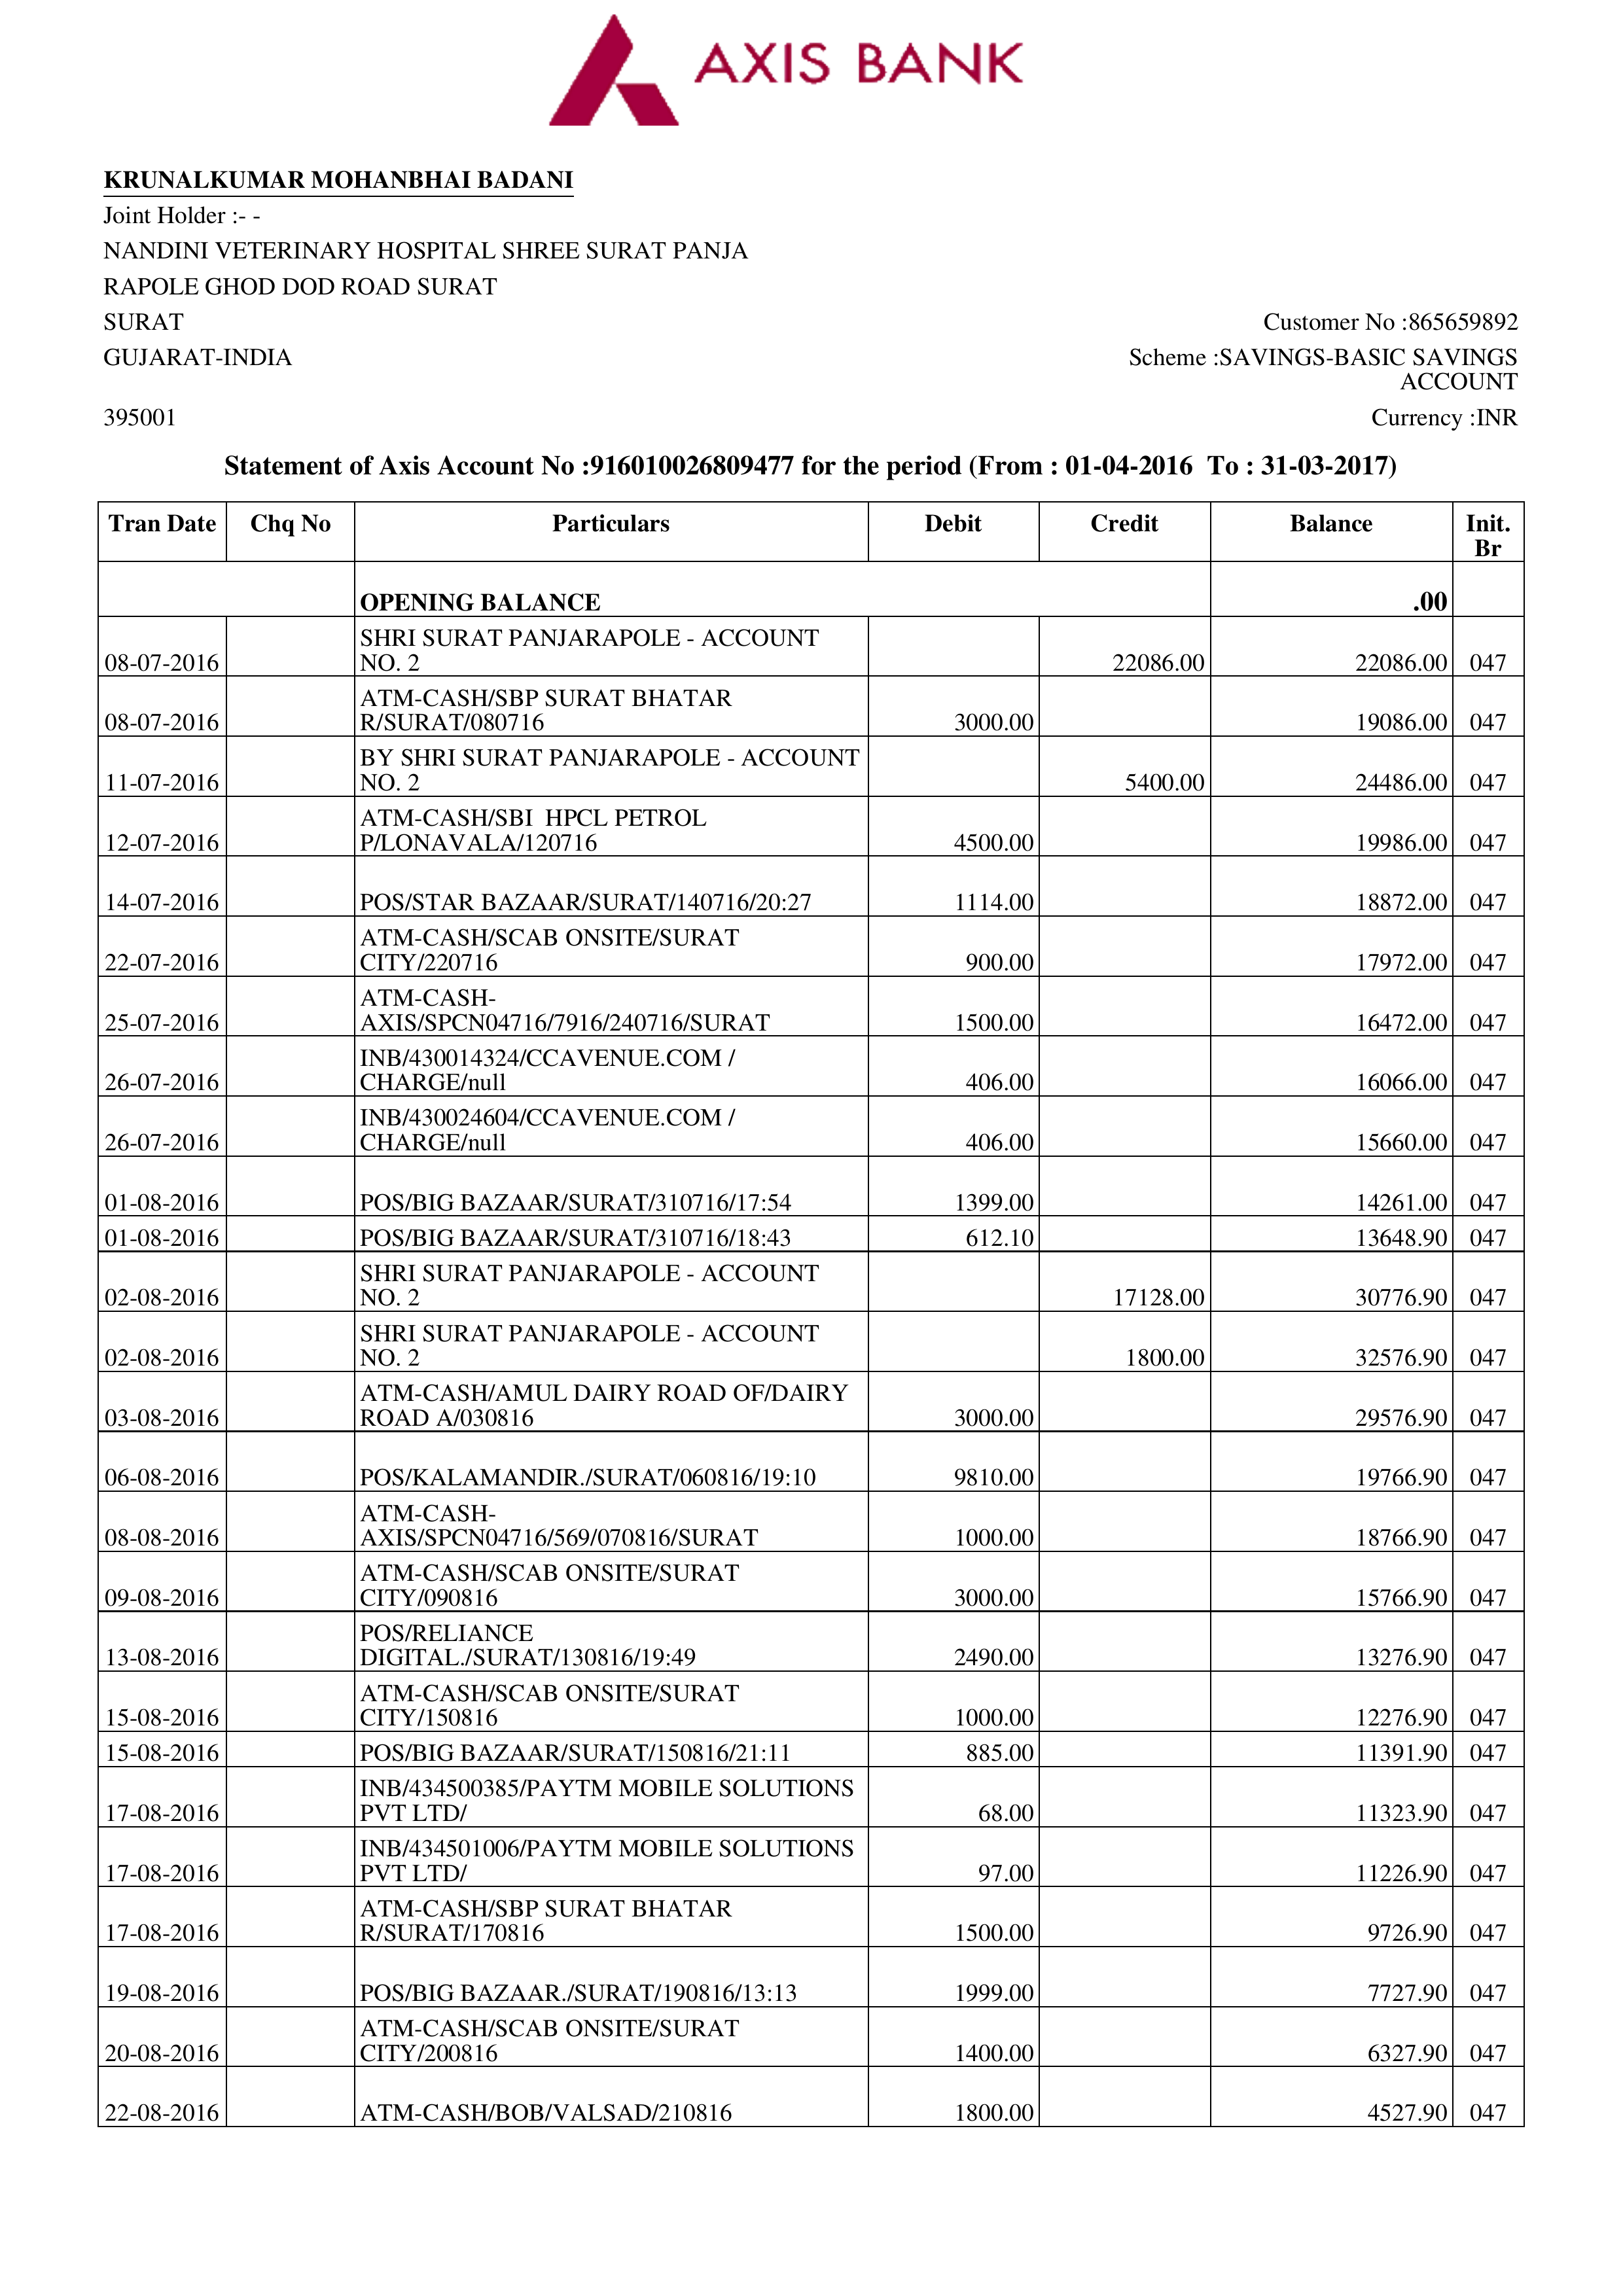

In [38]:
image

In [ ]:
import torch

torch.cuda.empty_cache()       # Releases all unused memory
torch.cuda.ipc_collect()       # Cleans inter-process communication memory


In [ ]:
print(f"Allocated: {torch.cuda.memory_allocated() / 1024**2:.1f} MB")
print(f"Cached:    {torch.cuda.memory_reserved() / 1024**2:.1f} MB")


Allocated: 14700.2 MB
Cached:    14846.0 MB


In [ ]:
del model, tokenizer, inputs
torch.cuda.empty_cache()



In [51]:
len(inputs)

8

In [52]:
inputs[0]

[[0,
  '\nYou are an expert in analyzing bank statements. Given the OCR-extracted text from a bank statement image, extract the following details accurately and return them in a structured Python dictionary format. in form of a JSON:\n\n{\n    "name": "...",\n    "address": "...",\n    "account number": "...",\n    "ifsc code": "...",\n    "branch": "...",\n    "statement_period": "...",  # from which date to which date\n    "bank name": "..."\n}\n\nIf any information is missing or unclear, return the corresponding value as None or an empty string.please no explanation\n',
  '\\{[^{}]*\\}'],
 {'input_ids': tensor([[151644,   8948,    198,  ..., 151644,  77091,    198]],
        device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[1.9303, 1.9303, 1.9303,  ..., 2.1459, 2.1459, 2.1459],
         [1.9303, 1.9303, 1.9303,  ..., 2.1459, 2.1459, 2.1459],
         [1.9303, 1.9303, 1.9303,  ..., 2.1459, 2.1459, 2.1459],
         ...,


In [ ]:
with concurrent.futures.ThreadPoolExecutor(max_workers=1) as executor:
  results = list(executor.map(run_llm, inputs))
print("\n📦 All results:")
for r in results:
  print(r)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


starting new page


The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


starting new page


The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


starting new page


In [39]:
FastVisionModel.for_inference(model)
instructs = [ instruction_account_info]
inputs = []
streamer = TextStreamer(tokenizer, skip_prompt=True)
for inst in instructs:
    messages = [
        {"role": "user", "content": [
            {"type": "image"},
            {"type": "text", "text": inst}
        ]}
    ]
    input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
    inputs.append(tokenizer(
        image,
        input_text,
        add_special_tokens=False,
        return_tensors="pt",
    ).to("cuda"))
for input in inputs:
    output_ids = model.generate(
        **input,
        max_new_tokens=4096,
        use_cache=True,
        do_sample=False
    )
    output_text = tokenizer.batch_decode(output_ids, skip_special_tokens=True,skip_prompt=True)[0]
    print(output_text)
    match = re.search(r'\[\s*\{.*?\}\s*\]', output_text, re.DOTALL)

    if match:
        json_str = match.group(0)
        try:
            data = json.loads(json_str)
            print("✅ Parsed JSON:", data)
        except json.JSONDecodeError as e:
            print("❌ JSON parsing error:", e)
    else:
        print("❌ No JSON array of objects found.")
    
    # _ = model.generate(
    #     **input,
    #     streamer= streamer,
    #     max_new_tokens= 4096,
    #     use_cache = True,
    #     do_sample=False)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


system
You are a helpful assistant.
user

You are an expert in analyzing bank statements. Given the OCR-extracted text from a bank statement image, extract the following details accurately and return them in a structured Python dictionary format. in form of a JSON:

{
    "name": "...",
    "address": "...",
    "account number": "...",
    "ifsc code": "...",
    "branch": "...",
    "statement_period": "...",  # from which date to which date
    "bank name": "..."
}

If any information is missing or unclear, return the corresponding value as None or an empty string.please no explanation

assistant
```json
{
    "name": "KRUNALKUMAR MOHANBHAI BADANI",
    "address": "NANDINI VETERINARY HOSPITAL SHREE SURAT PANJA RAPOLE GHOD DOD ROAD SURAT SURAT GUJARAT-INDIA 395001",
    "account number": "865659892",
    "ifsc code": "",
    "branch": "RAPOLE GHOD DOD ROAD SURAT",
    "statement_period": "From : 01-04-2016 To : 31-03-2017",
    "bank name": "AXIS BANK"
}
```
❌ No JSON array of object

In [48]:
match = re.search(r'\{[^{}]*\}', output_text.replace(instruction_account_info,''), re.DOTALL)
print(match)
if match:
    json_str = match.group(0)
    print(json_str)
    try:
        data = json.loads(json_str)
        print("✅ Parsed JSON:", data)
    except json.JSONDecodeError as e:
        print("❌ JSON parsing error:", e)
else:
    print("❌ No JSON array of objects found.")

<re.Match object; span=(60, 415), match='{\n    "name": "KRUNALKUMAR MOHANBHAI BADANI",\n >
{
    "name": "KRUNALKUMAR MOHANBHAI BADANI",
    "address": "NANDINI VETERINARY HOSPITAL SHREE SURAT PANJA RAPOLE GHOD DOD ROAD SURAT SURAT GUJARAT-INDIA 395001",
    "account number": "865659892",
    "ifsc code": "",
    "branch": "RAPOLE GHOD DOD ROAD SURAT",
    "statement_period": "From : 01-04-2016 To : 31-03-2017",
    "bank name": "AXIS BANK"
}
✅ Parsed JSON: {'name': 'KRUNALKUMAR MOHANBHAI BADANI', 'address': 'NANDINI VETERINARY HOSPITAL SHREE SURAT PANJA RAPOLE GHOD DOD ROAD SURAT SURAT GUJARAT-INDIA 395001', 'account number': '865659892', 'ifsc code': '', 'branch': 'RAPOLE GHOD DOD ROAD SURAT', 'statement_period': 'From : 01-04-2016 To : 31-03-2017', 'bank name': 'AXIS BANK'}


In [35]:
import re
import json

text = output_text

# Extract the JSON array of objects
match = re.search(r'\[\s*\{.*?\}\s*\]', text, re.DOTALL)

if match:
    json_str = match.group(0)
    try:
        data = json.loads(json_str)
        print("✅ Parsed JSON:", data)
    except json.JSONDecodeError as e:
        print("❌ JSON parsing error:", e)
else:
    print("❌ No JSON array of objects found.")


✅ Parsed JSON: [{'TXN_DATE': '28-03-2017', 'TXN_DESC': 'POS/METRO CASH AND CA/SURAT/280317/20:33', 'CHEQUE_REF_NO': '', 'WITHDRAWAL_AMT': '', 'DEPOSIT_AMT': '1348.00', 'BALANCE_AMT': '3676.79'}, {'TXN_DATE': '29-03-2017', 'TXN_DESC': 'Rupay issuing refund 27.03.17', 'CHEQUE_REF_NO': '', 'WITHDRAWAL_AMT': '', 'DEPOSIT_AMT': '', 'BALANCE_AMT': '3679.04'}, {'TXN_DATE': '29-03-2017', 'TXN_DESC': 'INB/482606656/AGRICULTURAL SCIENTISTS RECRUI(BILL', 'CHEQUE_REF_NO': '', 'WITHDRAWAL_AMT': '', 'DEPOSIT_AMT': '257.90', 'BALANCE_AMT': '3421.14'}, {'TXN_DATE': '30-03-2017', 'TXN_DESC': 'CHQ-130724, 130725', 'CHEQUE_REF_NO': '', 'WITHDRAWAL_AMT': '', 'DEPOSIT_AMT': '', 'BALANCE_AMT': '20976.00'}, {'TXN_DATE': '31-03-2017', 'TXN_DESC': 'To Charges/NEFT/IR/AXIR170906633331/incl of ST @15', 'CHEQUE_REF_NO': '', 'WITHDRAWAL_AMT': '', 'DEPOSIT_AMT': '2.88', 'BALANCE_AMT': '24394.26'}, {'TXN_DATE': '31-03-2017', 'TXN_DESC': 'INB/NEFT/AXIR170906633331/Nilesh badani', 'CHEQUE_REF_NO': '', 'WITHDRAWAL_AMT'

In [ ]:
image = images[1]

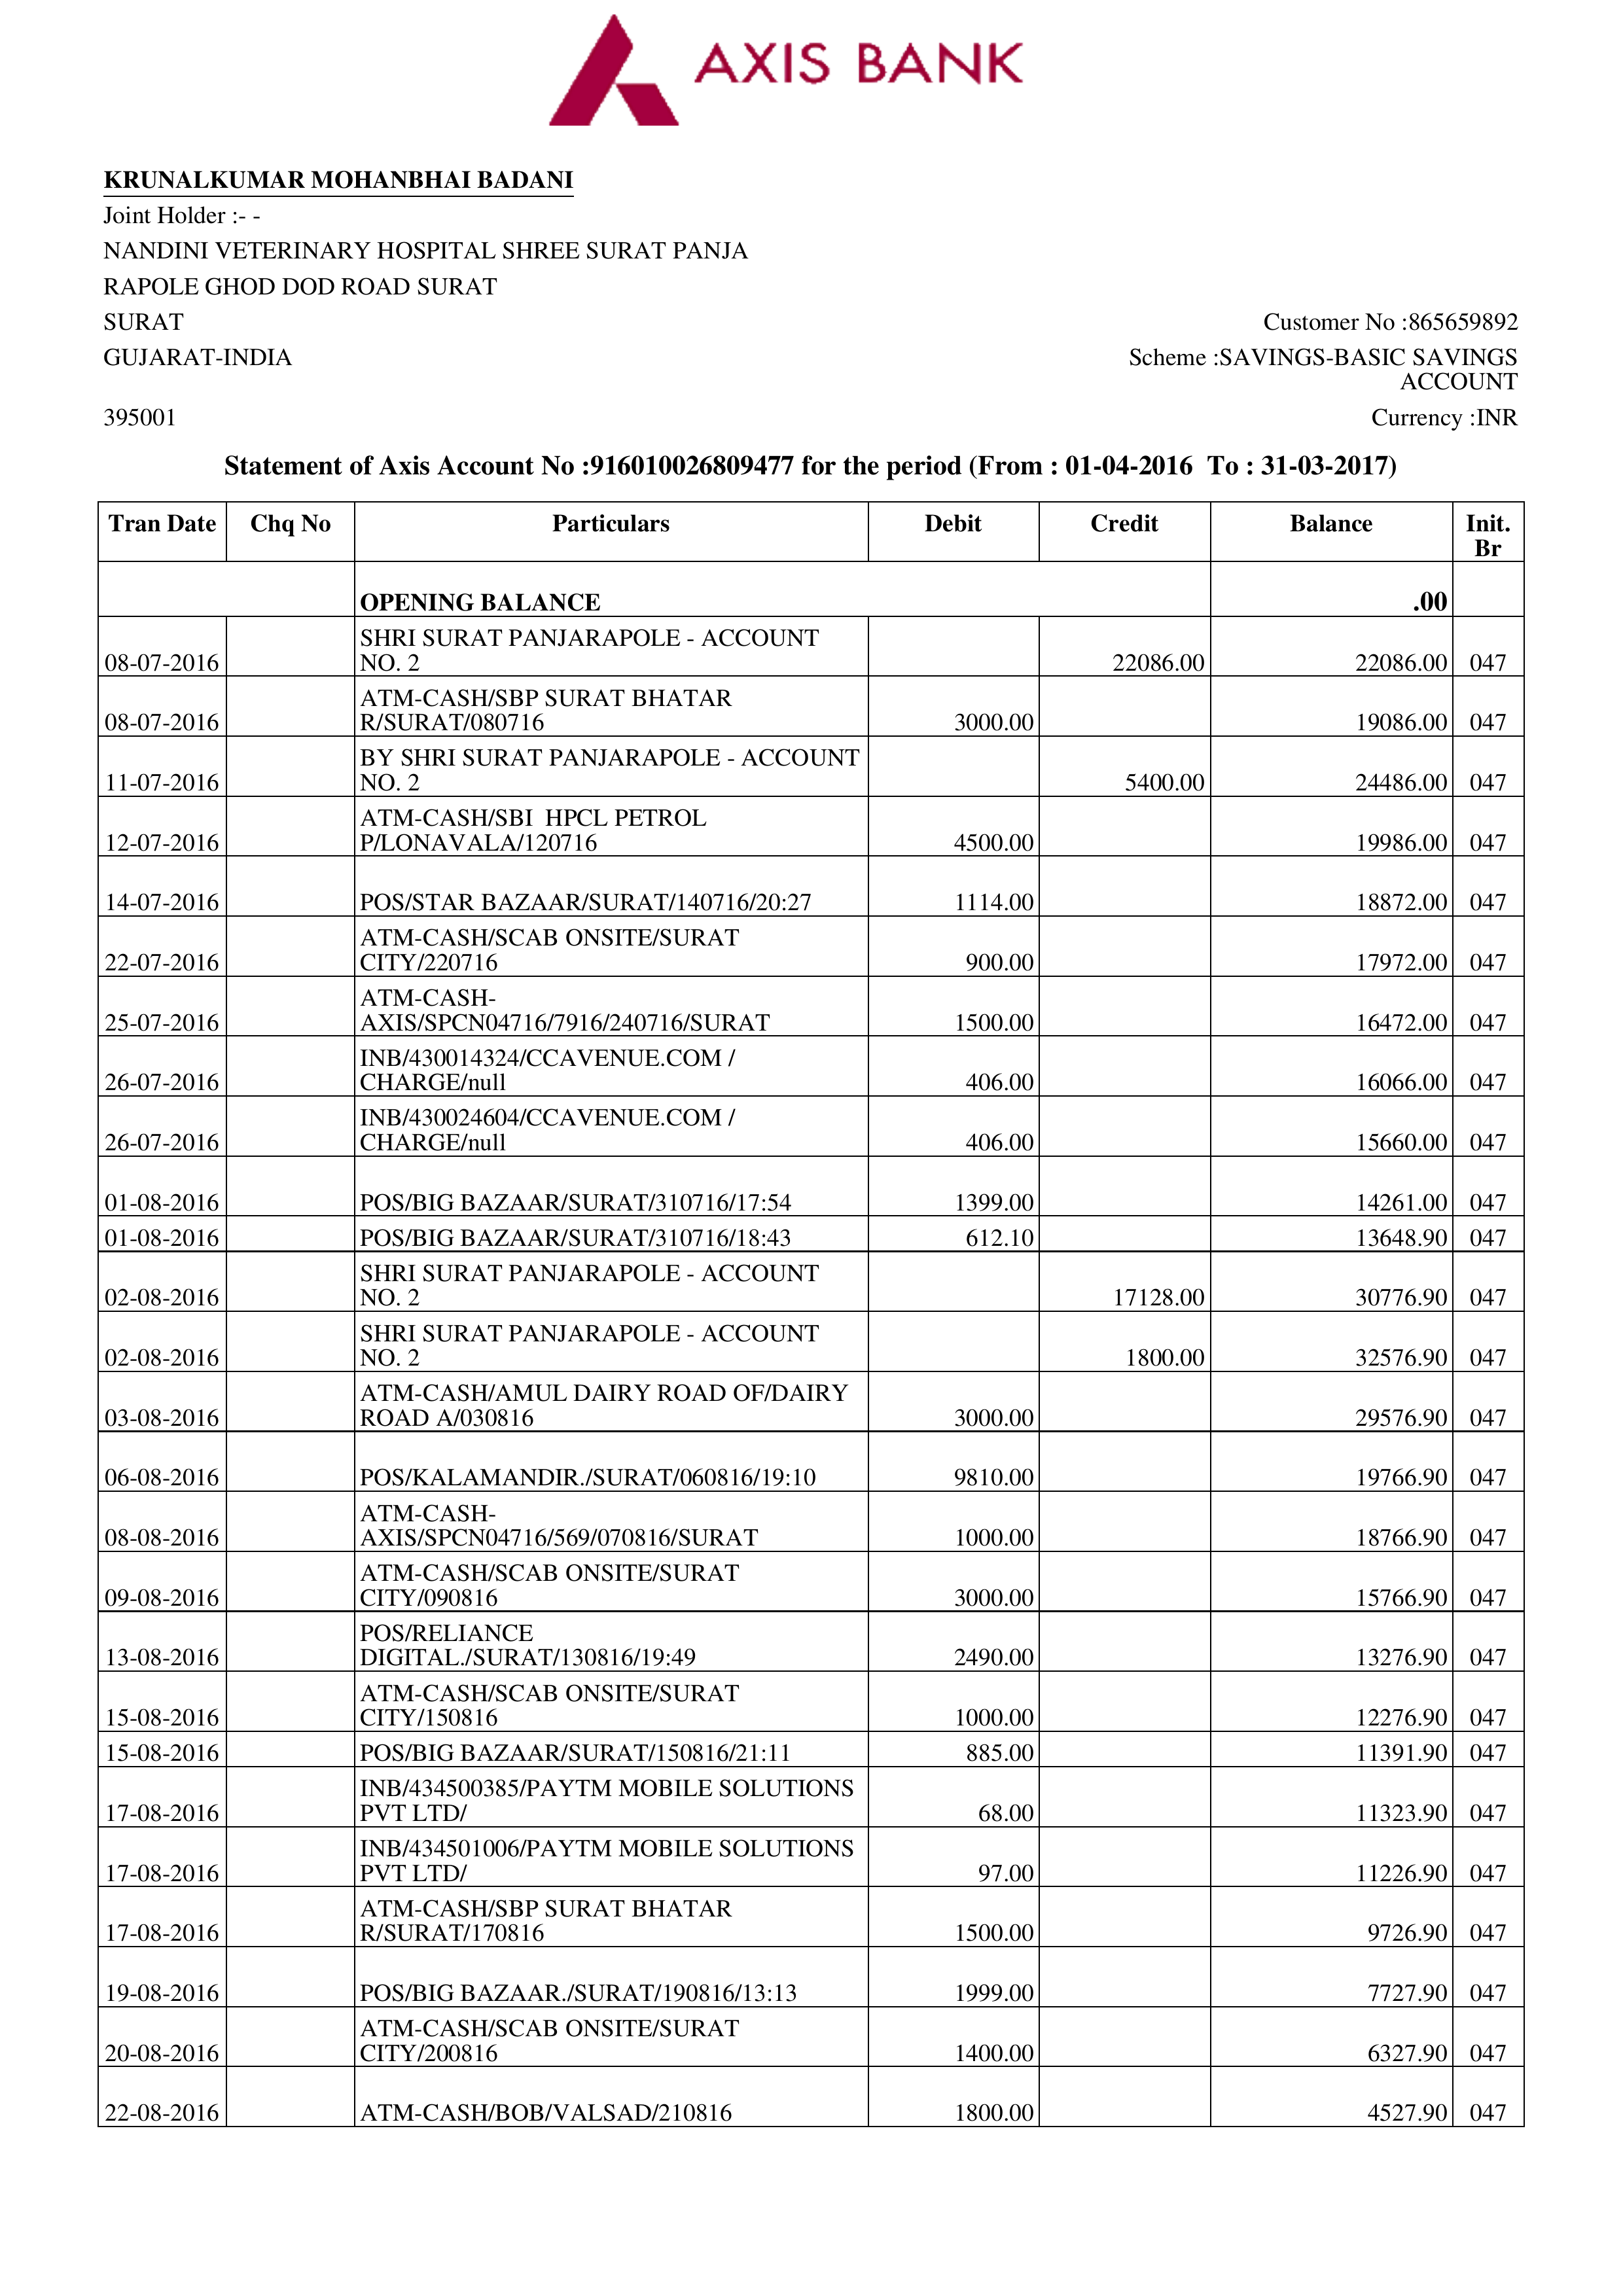

In [17]:
FastVisionModel.for_inference(model)
# image = dataset[0]["image"]
# instruction = "You are an expert radiographer. Describe accurately what you see in this image."
inputs = []
# instruction_account_info,
for inst in [instruction_account_info,instruction_transactions]:
    messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": inst}
    ]}
    ]
    input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
    inputs.append(tokenizer(
        image,
        input_text,
        add_special_tokens = False,
        return_tensors = "pt",
    ).to("cuda"))
image

In [ ]:
import io
import sys

In [ ]:
# old_stdout = sys.stdout
# mystdout = io.StringIO()
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
for input in inputs:
    _ = model.generate(**input, streamer = text_streamer, max_new_tokens = 1024,
                   use_cache = True,do_sample=False )
    # temperature = 0.3, top_p = 1.0
# captured_text = mystdout.getvalue()
# sys.stdout = old_stdout
# print('final_output',captured_text)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


**Step 1: Extract the name from the bank statement image.**

The name is "KRISHNA DAILYNEED STORE".

**Step 2: Extract the address from the bank statement image.**

The address is "RAJVEER FURNITURE HOUSE KE PASS AGRA ROAD CHUNGI ETAH".



The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


**Step<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>
You are an expert in analyzing bank statements. Given the OCR-extracted text from a bank statement image, extract the following details accurately and return them in a structured Python dictionary format:

{
    "name": "...",
    "address": "...",
    "account number": "...",
    "ifsc code": "...",
    "branch": "...",
    "statement_period": "...",  # from which date to which date
    "bank name": "..."
}

If any information is missing or unclear, return the corresponding value as None or an empty string.
<|eot_id|><|start_header_id|>assistant<|end_header_id|>

**Step 

KeyboardInterrupt: 

In [ ]:
text_streamer.

AttributeError: 'TextStreamer' object has no attribute 'get_text'

In [ ]:
from transformers import TextStreamer
from io import StringIO

class CapturingStreamer(TextStreamer):
    def __init__(self, tokenizer, skip_prompt=True):
        super().__init__(tokenizer, skip_prompt=skip_prompt)
        self.output = StringIO()

    def on_final_text(self, text, stream_end=False):
        # Store the final text
        self.output.write(text)
        # Also print to console (like standard streamer)
        super().on_final_text(text, stream_end)

    def get_text(self):
        return self.output.getvalue()


In [ ]:
# Initialize the streamer
streamer = CapturingStreamer(tokenizer, skip_prompt=True)

# Generate tokens with streaming
_ = model.generate(
    **inputs,
    streamer=streamer,
    max_new_tokens=8192,
    use_cache=True,
    temperature=0.9,
    top_p=0.9
)

# Retrieve the captured output
generated_text = streamer.get_text()

print("🧾 Stored Output:\n", generated_text)


[{'TXN_DATE': '02/01/18', 'TXN_DESC': 'ACH D- TP ACH TATA MOTOR FN-71806131', 'CHEQUE_REF_NO': '0000001272174413', 'WITHDRAWAL_AMT': '13,179.00', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '6,941.48'}, {'TXN_DATE': '03/01/18', 'TXN_DESC': 'IMPS-800310164682-NIKHIL SINGH-PUNB-XXXX', 'CHEQUE_REF_NO': '0000800310164682', 'WITHDRAWAL_AMT': '4,000.00', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '2,941.48'}, {'TXN_DATE': '05/01/18', 'TXN_DESC': 'ANI TECHNOLOGI-SINGH, AKHILESH', 'CHEQUE_REF_NO': '0000801043063409', 'WITHDRAWAL_AMT': '1,716.66', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '4,658.14'}, {'TXN_DATE': '06/01/18', 'TXN_DESC': 'IB BILLPAY DR-HDFCTT-524181XXXXXXX2757', 'CHEQUE_REF_NO': 'IB06-18040406273700', 'WITHDRAWAL_AMT': '1,000.00', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '3,658.14'}, {'TXN_DATE': '09/01/18', 'TXN_DESC': 'IMPS-800918145881-SURAJ SHANTILAL JAIN-U', 'CHEQUE_REF_NO': '0000800918145881', 'WITHDRAWAL_AMT': '2,450.00', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '1,208.14'}, {'TXN_DATE': '09/01/18', '

In [ ]:
generated_text

''

In [ ]:
import torch

# Generate output tokens (without streaming)
generated_ids = model.generate(
    **inputs,
    max_new_tokens=4096,
    # do_sample=True,           # optional: for creative generation
    temperature=0.9,
    top_p=0.9,
    use_cache=True
)

# Decode the output tokens to string
generated_text = tokenizer.batch_decode(generated_ids, skip_prompt=True)[0]

print("🧾 Output:\n", generated_text)


🧾 Output:
 <|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>You are an expert bankstatement analyser. extract all the transactions from the image in form of list of dictionary with the keys TXN_DATE(Type:Date),TXN_DESC(type:String),CHEQUE_REF_NO(type:String),WITHDRAWAL_AMT(type:Float),DEPOSIT_AMT(type:Float),BALANCE_AMT(type:Float).Think mathematically to match the current balance according to the deposits and withdrawals  <|eot_id|><|start_header_id|>assistant<|end_header_id|>

[{'TXN_DATE': '06-04-2022', 'TXN_DESC': 'NEFT-N096221115721928-RESILIENT INNOVATIONS PRIVAT', 'CHEQUE_REF_NO': 'NA', 'WITHDRAWAL_AMT': 'NA', 'DEPOSIT_AMT': '1,491.98', 'BALANCE_AMT': '52,690.88'}, {'TXN_DATE': '06-04-2022', 'TXN_DESC': 'ATM/CASH/209610003994XXXXXXXXXXXX2038', 'CHEQUE_REF_NO': '10,024.78', 'WITHDRAWAL_AMT': 'NA', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '42,666.10'}, {'TXN_DATE': '06-04-2022', 'TXN_DESC': 'ATM/CASH/209610003995XXXXXXXXXXXX2038', 'CHEQUE_REF_NO': '10,024.78', 'WITHD

In [ ]:
generated_text

"<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n\n<|image|>You are an expert bankstatement analyser. extract all the transactions from the image in form of list of dictionary with the keys TXN_DATE(Type:Date),TXN_DESC(type:String),CHEQUE_REF_NO(type:String),WITHDRAWAL_AMT(type:Float),DEPOSIT_AMT(type:Float),BALANCE_AMT(type:Float).Think mathematically to match the current balance according to the deposits and withdrawals  <|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n[{'TXN_DATE': '06-04-2022', 'TXN_DESC': 'NEFT-N096221115721928-RESILIENT INNOVATIONS PRIVAT', 'CHEQUE_REF_NO': 'NA', 'WITHDRAWAL_AMT': 'NA', 'DEPOSIT_AMT': '1,491.98', 'BALANCE_AMT': '52,690.88'}, {'TXN_DATE': '06-04-2022', 'TXN_DESC': 'ATM/CASH/209610003994XXXXXXXXXXXX2038', 'CHEQUE_REF_NO': '10,024.78', 'WITHDRAWAL_AMT': 'NA', 'DEPOSIT_AMT': 'NA', 'BALANCE_AMT': '42,666.10'}, {'TXN_DATE': '06-04-2022', 'TXN_DESC': 'ATM/CASH/209610003995XXXXXXXXXXXX2038', 'CHEQUE_REF_NO': '10,024.78', 'WITHDRAWAL_

In [18]:
FastVisionModel.for_training(model)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer),
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 30,
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

trainer_stats = trainer.train()

used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")


Unsloth: Model does not have a default image size - using 512
GPU = NVIDIA RTX A6000. Max memory = 47.529 GB.
15.584 GB of memory reserved.


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 16 | Num Epochs = 15 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,084,928 of 3,795,183,616 (1.08% trained)


Unsloth: Will smartly offload gradients to save VRAM!


290.7585 seconds used for training.
4.85 minutes used for training.
Peak reserved memory = 15.584 GB.
Peak reserved memory for training = 0.0 GB.
Peak reserved memory % of max memory = 32.788 %.
Peak reserved memory for training % of max memory = 0.0 %.


In [ ]:
from PIL import Image

image_path = "/content/drive/MyDrive/bankstatement/BANKOFBARODA0001.jpg"
image = Image.open(image_path).convert("RGB")  # Always convert to RGB for consistency


In [ ]:
print("\nAfter training:\n")
FastVisionModel.for_inference(model)
# image = dataset[0]["image"]
# instruction = "You are an expert radiographer. Describe accurately what you see in this image."

# messages = [
#     {"role": "user", "content": [
#         {"type": "image"},
#         {"type": "text", "text": instruction}
#     ]}
# ]
from transformers import TextStreamer
import torch

# # Custom streamer to capture output in a variable
# class CapturingTextStreamer(TextStreamer):
#     def __init__(self, tokenizer, **kwargs):
#         super().__init__(tokenizer, **kwargs)
#         self.generated_text = ""

#     def on_final_token(self, token_id: int):
#         text = self.tokenizer.decode([token_id], skip_special_tokens=True)
#         self.generated_text += text

#     def get_text(self):
#         return self.generated_text

# # Prepare input
# input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")

# # Use the custom streamer
# streamer = CapturingTextStreamer(tokenizer, skip_prompt=True)

# # Generate output
# _ = model.generate(
#     **inputs,
#     streamer=streamer,
#     max_new_tokens=4096,
#     use_cache=True,
#     temperature=1.0,
#     min_p=0.1
# )

# Access the result
# generated_output = streamer.get_text()
# print("🔍 Model Output:\n", generated_output)


text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 4096,
                   use_cache = True, temperature = 0.9, min_p = 0.2)


After training:



TypeError: argument of type 'NoneType' is not iterable

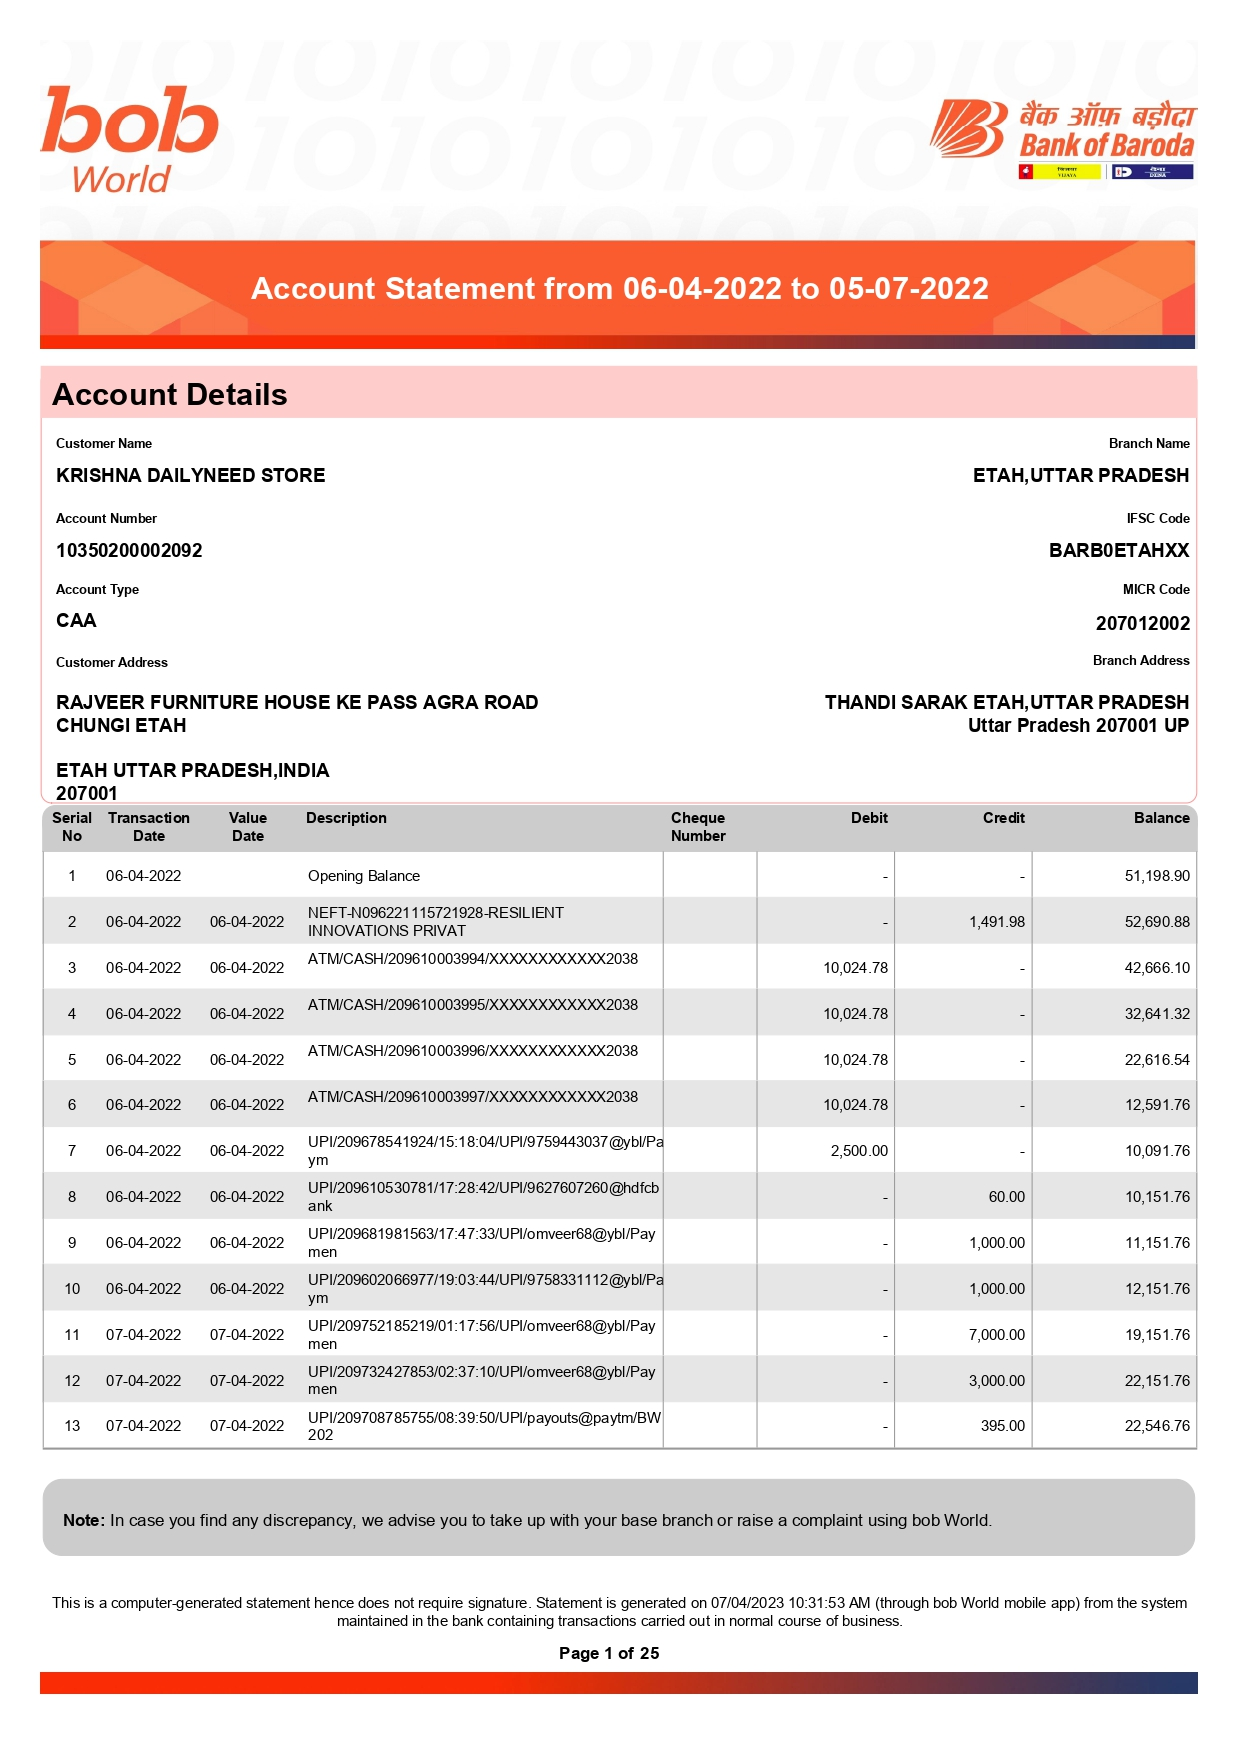

In [ ]:
image

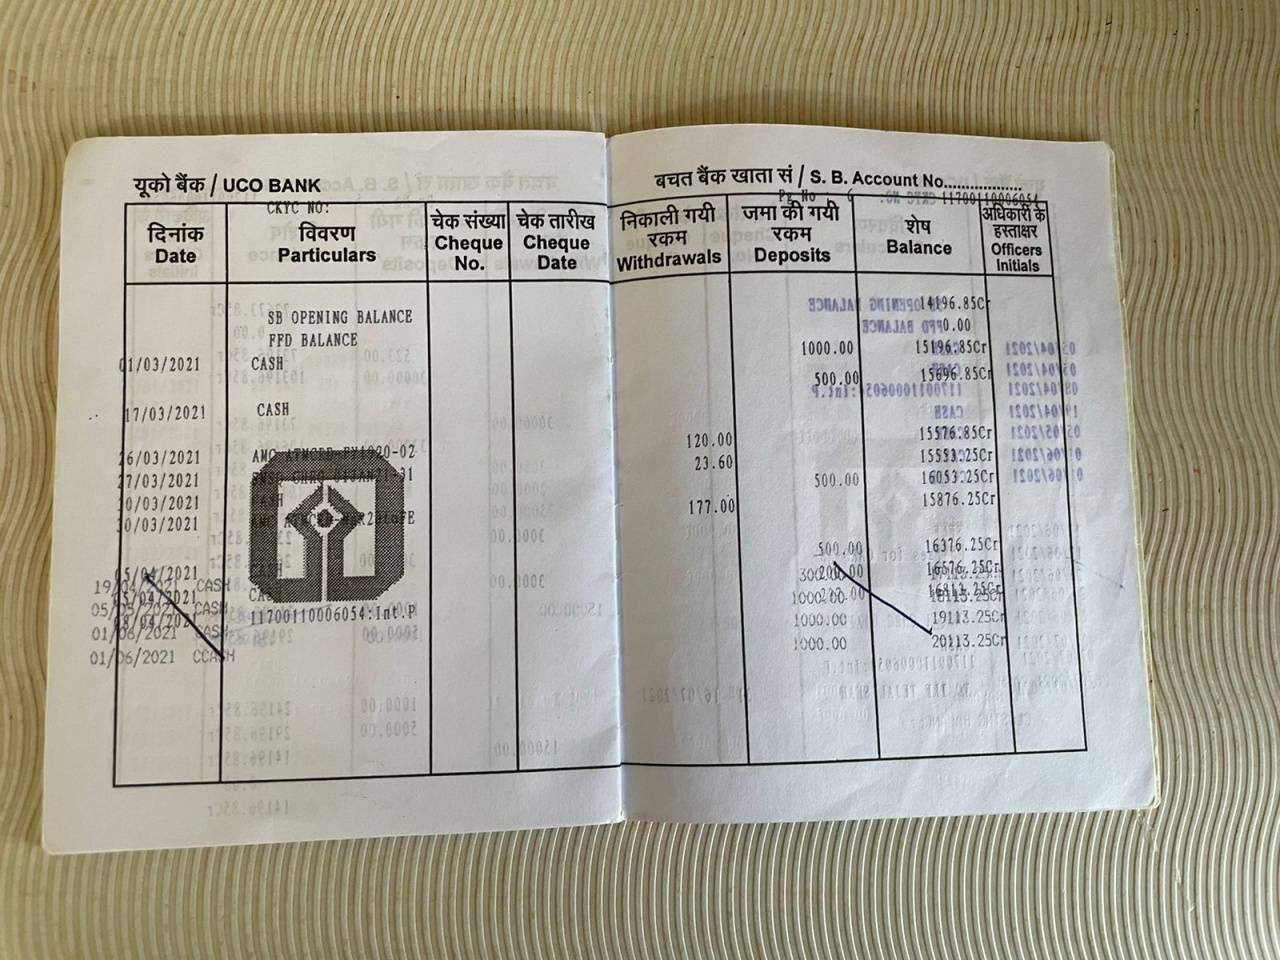

In [ ]:
import json
# json.loads(dataset[0]['ground_truth'])['gt_parse']['bank_stmt_entries']
dataset[0]['image']

In [ ]:
model.save_pretrained("lora_model")
tokenizer.save_pretrained("lora_model")

model.save_pretrained_merged("siddharthaspr/Llama-3.2-11B-Vision-bankstatement", tokenizer,)
model.push_to_hub_merged("siddharthaspr/Llama-3.2-11B-Vision-bankstatement", tokenizer, save_method = "merged_16bit", token = os.environ.get("HF_TOKEN"))

Found HuggingFace hub cache directory: /root/.cache/huggingface/hub
Checking cache directory for required files...
Cache check failed: model-00001-of-00005.safetensors not found in local cache.
Not all required files found in cache. Will proceed with downloading.



Unsloth: Merging weights into 16bit:   0%|          | 0/5 [00:00<?, ?it/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]


Unsloth: Merging weights into 16bit:  20%|██        | 1/5 [00:35<02:20, 35.02s/it]

model-00002-of-00005.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]


Unsloth: Merging weights into 16bit:  40%|████      | 2/5 [01:33<02:25, 48.61s/it]

model-00003-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]


Unsloth: Merging weights into 16bit:  60%|██████    | 3/5 [02:10<01:26, 43.36s/it]

model-00004-of-00005.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]


Unsloth: Merging weights into 16bit:  80%|████████  | 4/5 [02:42<00:39, 39.12s/it]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit: 100%|██████████| 5/5 [02:53<00:00, 34.70s/it]
No files have been modified since last commit. Skipping to prevent empty commit.


Uploading...:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


Found HuggingFace hub cache directory: /root/.cache/huggingface/hub
Checking cache directory for required files...
Cache check failed: model-00001-of-00005.safetensors not found in local cache.
Not all required files found in cache. Will proceed with downloading.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.
Unsloth: Merging weights into 16bit:   0%|          | 0/5 [00:00<?, ?it/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/4.99G [00:00<?, ?B/s]


Unsloth: Merging weights into 16bit:  20%|██        | 1/5 [01:41<06:45, 101.40s/it]

model-00002-of-00005.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/4.97G [00:00<?, ?B/s]


Unsloth: Merging weights into 16bit:  40%|████      | 2/5 [03:34<05:24, 108.16s/it]

model-00003-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/4.92G [00:00<?, ?B/s]


Unsloth: Merging weights into 16bit:  60%|██████    | 3/5 [05:28<03:41, 110.76s/it]

model-00004-of-00005.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/5.00G [00:00<?, ?B/s]


Unsloth: Merging weights into 16bit:  80%|████████  | 4/5 [07:20<01:51, 111.57s/it]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit: 100%|██████████| 5/5 [07:58<00:00, 95.64s/it]


In [ ]:
!pip -q install pytesseract

In [ ]:
import pytesseract
from PIL import Image
from transformers import pipeline

# Optional for Windows users
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load image
image_path = "/content/drive/MyDrive/bankstatement/BANKOFBARODA0001.jpg"  # or .png, .jpeg
image = Image.open(image_path)

# Step 1: Extract text from image
extracted_text = pytesseract.image_to_string(image)

# Step 2: Load QA model
qa_model = pipeline("question-answering", model="ChakuChidiya/bank_statement_qa_model_4")

# Step 3: Questions to extract details
questions = {
    "name": "What is the name of the account holder?",
    "address": "What is the address mentioned in the statement?",
    "account number": "What is the account number?",
    "ifsc code": "What is the IFSC code?",
    "branch": "Which branch is the account from?",
    "statement_period": "What is the statement period or date range?",
    "bank name": "What is the name of the bank?"
}

# Step 4: Run QA for each detail
results = {}
for key, question in questions.items():
    try:
        result = qa_model(question=question, context=extracted_text)
        results[key] = result['answer']
    except:
        results[key] = None  # In case model fails for any reason

# Step 5: Output the extracted data
print(results)


OSError: bank_statement_qa_model_4 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`